# JANE STREET PREDICTION

#### S Sexton
#### Dec 12, 2020

### Table of Contents

* [1. Project Goal](#project_goal)
* [2. Load Libraries](#libraries)
* [3. Load Data](#data)
* [4. Review Data](#format)
* [5. Missing Data](#missing)

Notes:
- determine if features are a bunch of indicators with them turned on and off based on tags
- less volatile returns achieved, bigger the score
- dates are very likely day periods
- model must coose to accept or reject (1=make trade, 0=no trade)
- look for correlations in resp_1 to find trades want to take and not take
- resp_1 to resp_4 i think are returns over different time horizons NOT in test set, trades = weight 0 not contribute to scoring evaluation; so can i add returns together or hightest return or do each return separately
- feature_0 to feature_129 - maybe different things like moving averages, exponential ma, macad, relative strength
- time series API to ensure models do NOT peek forward in time, use API provided
- each row possible trade in train
- trend of features and weights of features change, just use top 50?, do test to determine the right #
- try without weight as well since weight may not matter

# 1. Project Goal <a class="anchor" id="project_goal"></a>
Participants have until February 22, 2021 to build a quantitative trading model to maximize returns using market data from a major global stock exchange. 
<br>Then, up until August 23, 2021, the predictiveness of the model will be tested with real market data and the position in the leaderboard will be updated.
<br>In the challenge, there will be a number of potential trading opportunities and the model must choose whether to accept or reject the trade.
<br>Developing good models will be challenging for many reasons, including a very low signal-to-noise ratio, potential redundancy, strong feature correlation, and difficulty of coming up with a proper mathematical formulation.

# 2. Load Libraries <a class="anchor" id="libraries"></a>

In [149]:
import pandas as pd # for data manipulation and analysis, imported as alias pd
import numpy as np # for working with arrays, imported as alias np
import seaborn as sns # for charting
import matplotlib.pylab as plt # for charting
import warnings 
import os # change working directory

# !pip install datatable
import datatable as dt # for using fread


sns.set_style('whitegrid') # sets aesthetics for seaborn charts
# sets plot inline
%matplotlib inline

# 3. Load Data <a class="anchor" id="data"></a>

In [150]:
# ensure in correct directory
os.chdir('C:\\Users\\sexto\\Desktop\\Sandra\\NEWdataanalyst\\Projects\\Kaggle\\JaneStreet\data')

In [151]:
# use datatable to efficiently read in train and features files
# then convert to pandas dataframe

train = dt.fread('train.csv').to_pandas()
features = dt.fread('features.csv').to_pandas()

# 4. Review Data <a class="anchor" id="data"></a>

### Check and change format if necessary

In [152]:
type(train)

pandas.core.frame.DataFrame

In [153]:
type(features)

pandas.core.frame.DataFrame

Both train & features are in a panada dataframe so in proper format.

### Check and change variable type if necessary

##### TRAIN file

In [154]:
# gives a detailed look of each column type
# Index of series is column name
dataTypeSeries = train.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries.to_string())

Data type of each column of Dataframe :
date             int32
weight         float64
resp_1         float64
resp_2         float64
resp_3         float64
resp_4         float64
resp           float64
feature_0        int32
feature_1      float64
feature_2      float64
feature_3      float64
feature_4      float64
feature_5      float64
feature_6      float64
feature_7      float64
feature_8      float64
feature_9      float64
feature_10     float64
feature_11     float64
feature_12     float64
feature_13     float64
feature_14     float64
feature_15     float64
feature_16     float64
feature_17     float64
feature_18     float64
feature_19     float64
feature_20     float64
feature_21     float64
feature_22     float64
feature_23     float64
feature_24     float64
feature_25     float64
feature_26     float64
feature_27     float64
feature_28     float64
feature_29     float64
feature_30     float64
feature_31     float64
feature_32     float64
feature_33     float64
feature_34     fl

In [155]:
# look at variable values
for var in train.columns:
    print(var, train[var].unique()[0:20], '\n')

date [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] 

weight [ 0.         16.67351476  0.13853087  0.19057532  3.82084431  0.11655658
  0.16011738  0.10965051  0.19943521  0.29810842  0.75936709  0.81185077
  0.09853886  0.90872372  1.21139944  0.4051991   0.49607981  5.24972117
  0.14832056  2.82077728] 

resp_1 [ 0.00991599 -0.00282823  0.02513386 -0.00473014  0.00125215 -0.00104722
 -0.00193919  0.0173948  -0.00545951  0.00597634  0.0068989  -0.00551237
 -0.00370614  0.01820501 -0.01532788 -0.00375298  0.01529536 -0.00118371
  0.00529031 -0.00419512] 

resp_2 [ 0.01407858 -0.00322632  0.02760739 -0.00327283  0.00216496 -0.00270018
 -0.00230082  0.02136124 -0.00730076  0.00434459  0.00340469 -0.00339506
 -0.00455118  0.00346246 -0.01239392 -0.00393392  0.02099854 -0.00198256
  0.00804586 -0.00766365] 

resp_3 [ 0.00877305 -0.00731949  0.03340572 -0.00046082 -0.00121549  0.00074333
  0.00108837  0.03116296 -0.00908511  0.02371198  0.00013351 -0.00327136
 -0.00683139 -0.

feature_26 [ 1.3193652  -0.66780608 -1.10343163 -1.64754295  2.56656067 -4.21272353
 -4.51032315 -2.30534975 -0.05989221  1.58600472  2.75013473  1.5484106
  1.42378946 -1.71809559  2.27074975  2.27765281  1.48385164 -0.51703824
  1.69129097  0.06971745] 

feature_27 [        nan -2.86127907  2.16510976 -1.10322687  1.38847819  1.87885755
  1.92713607 -0.9481606   2.26079987  1.14063303 -1.22424289  2.4913621
 -2.77497175  0.49816647 -1.84421443 -2.30641914  1.46678685 -1.31353125
 -1.99928459  2.0051112 ] 

feature_28 [        nan -2.41229076  2.19709353 -1.44642257  1.83917646  1.87759069
  1.93012526 -1.24666604  1.9584078   0.80108189 -1.12307413  2.30297538
 -2.66512751  0.47902156 -1.82109951 -2.45370894  1.47087349 -1.53331711
 -2.16440511  2.17250588] 

feature_29 [-0.51507254  0.91055792  5.13155872  4.76618167 -1.47790514  0.6671597
  0.20602775  1.16157065 -2.26356516 -0.48542779 -1.47100661 -0.88552366
 -0.29423104  5.2834644  -1.88522171 -2.1345405  -2.01600519  1.15172817

feature_58 [ 2.46882465 -1.70644982  0.62256055  0.84079999 -1.26538832 -1.26281035
 -1.26230174  1.25207183 -0.47757302 -0.63400104  0.77475501  1.87827792
 -1.0496537   1.63913267 27.22315021  1.27583305  2.34114194  1.67577767
  0.95025593  2.76952215] 

feature_59 [ 2.49006904 -0.88823572  0.95361872  0.79427391 -0.40206765 -0.37406869
 -0.36895261  1.67736672  0.39459058  0.5970856   1.68084972  0.97342886
 -0.39778827  2.00729514 56.64052118  2.03551256  2.27054519  1.3782264
  0.63004822  2.82369311] 

feature_60 [-1.14823927 -1.13829395 -1.12877427 -1.12717075 -1.18529462 -1.12122692
 -1.48329242 -1.45312477 -2.2473848  -1.23017304 -1.24025822 -1.10444192
 -1.53843545 -1.45878555 -1.12859543 -1.50428037 -2.64044827 -1.12902587
 -1.4804305  -1.12033678] 

feature_61 [-0.96193458 -0.95446135 -0.94650748 -0.94526082 -0.98647637 -0.94043805
 -1.23957792 -1.21595521 -1.87057785 -1.03035867 -1.03859119 -0.92555037
 -1.27916467 -1.22106811 -0.94634707 -1.25909887 -2.18005959 -0.946700

feature_90 [        nan  2.02591527  3.77619252 -0.82039516  0.79094499 -0.30956182
  2.57113268  1.20926388  2.5514031   2.58384182  4.66096413  0.93092285
  2.51105157  2.56931706  0.80975411  0.14129105  0.52479516  3.11947504
  3.5787606   0.5648222 ] 

feature_91 [ 1.15877038  1.15767054  2.42008852  2.33048435  4.34528167  7.85480157
  7.95254874  0.19925532 -0.22783017 -0.39625317 -0.38790571 -0.4125497
 -1.51561349  0.59998398 -0.41049963  2.05378624  0.10445443  0.84303879
  0.09083004  2.79529567] 

feature_92 [        nan  5.25374539  1.5349983   5.23699289 -0.0385606   2.72409567
  3.41139131  1.21352457  3.02187406 -1.29983642  2.10252503  0.04604996
  1.32571352  0.12075235  0.41115048  0.47808873 -1.48107687  4.12149592
  1.11155212 -0.87679666] 

feature_93 [ 3.75452205  1.29767858  0.80096218  0.18206636  2.73773835  3.80278602
  3.83368418 -0.12180636 -0.63639471 -0.29569137 -1.12151522 -1.0304046
  1.54316813  2.95567611  0.19672381 -1.21187486  0.90180651  3.1689392

feature_122 [ 1.1683914  -1.17884986  6.11574729  2.83885333  0.34484981  0.33711235
  0.33687278  2.10199748  1.53791293  1.79685998  2.32428956  2.59730909
  0.44099813  4.30917202  3.58745828  2.4170303   6.20382542 -0.42476741
  0.62052584  1.18239573] 

feature_123 [8.31358287 1.77747198 9.66790773 0.4992508  4.10114519 4.07945036
 4.07644739 4.84620211 4.78583799 3.17706401 4.88113303 5.08327962
 6.02168478 1.90850181 3.04709238 2.50549916 3.49506728 0.19903696
 3.59008636 8.38413284] 

feature_124 [ 1.78243254 -0.91545849  5.54287081  3.03373156  0.61425235  0.61396677
  0.61478262  1.47987504  1.63743531  0.9992517   2.11583045  1.68763402
  0.2869115   4.98372738  3.14727835  4.09883472  4.89215709  0.2791375
  1.32863269  1.59704918] 

feature_125 [14.01821301  2.83161206 11.67159473  1.51348823  6.62345579  6.62240981
  6.62217575  5.26132763  6.96800164  2.90643194  6.33724964  5.04473836
  7.33583844  3.83545708  3.85284527  6.4953145   3.59116505  2.76141329
  7.29852681 

In TRAIN file:
- date column is integer, not actually dates but not necessary that it is
- first feature column is integer
- the rest of feature columns are floats
- weight column is float
- ts_id is integer

There are no mixed number & variable columns. There are no categorical columns.

I will not be changing the variable types or feature engineering any of the columns.

##### FEATURES file

In [156]:
# gives a detailed look of each column type
# Index of series is column name
dataTypeSeries = features.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries.to_string())

Data type of each column of Dataframe :
feature    object
tag_0        bool
tag_1        bool
tag_2        bool
tag_3        bool
tag_4        bool
tag_5        bool
tag_6        bool
tag_7        bool
tag_8        bool
tag_9        bool
tag_10       bool
tag_11       bool
tag_12       bool
tag_13       bool
tag_14       bool
tag_15       bool
tag_16       bool
tag_17       bool
tag_18       bool
tag_19       bool
tag_20       bool
tag_21       bool
tag_22       bool
tag_23       bool
tag_24       bool
tag_25       bool
tag_26       bool
tag_27       bool
tag_28       bool


In [157]:
# look at variable values
for var in features.columns:
    print(var, features[var].unique()[0:20], '\n')

feature ['feature_0' 'feature_1' 'feature_2' 'feature_3' 'feature_4' 'feature_5'
 'feature_6' 'feature_7' 'feature_8' 'feature_9' 'feature_10' 'feature_11'
 'feature_12' 'feature_13' 'feature_14' 'feature_15' 'feature_16'
 'feature_17' 'feature_18' 'feature_19'] 

tag_0 [False  True] 

tag_1 [False  True] 

tag_2 [False  True] 

tag_3 [False  True] 

tag_4 [False  True] 

tag_5 [False  True] 

tag_6 [False  True] 

tag_7 [False  True] 

tag_8 [False  True] 

tag_9 [False  True] 

tag_10 [False  True] 

tag_11 [False  True] 

tag_12 [False  True] 

tag_13 [False  True] 

tag_14 [False  True] 

tag_15 [False  True] 

tag_16 [False  True] 

tag_17 [False  True] 

tag_18 [False  True] 

tag_19 [False  True] 

tag_20 [False  True] 

tag_21 [False  True] 

tag_22 [False  True] 

tag_23 [False  True] 

tag_24 [False  True] 

tag_25 [False  True] 

tag_26 [False  True] 

tag_27 [False  True] 

tag_28 [False  True] 



In FEATURES file:
- feature column is object
- rest of columns are boolean

There are no mixed number & variable columns. There are no categorical columns.

I will not be changing the variable types or feature engineering any of the columns.

### Get Basic Statistics

In [158]:
# printing size and shape 
print("Size of train- total number of elements = {}\nShape of train- rows then columns = {}".
format(train.size, train.shape))
print()
print("Size of features- total number of elements = {}\nShape of features- rows then columns = {}".
format(features.size, features.shape))

Size of train- total number of elements = 329887758
Shape of train- rows then columns = (2390491, 138)

Size of features- total number of elements = 3900
Shape of features- rows then columns = (130, 30)


In [159]:
# head, gives first few rows of data (n= num rows)
train.head(n=2)

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,...,NaN,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,...,NaN,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1


In [160]:
features.head(n=2)

,feature,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,...,tag_19,tag_20,tag_21,tag_22,tag_23,tag_24,tag_25,tag_26,tag_27,tag_28
0,feature_0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,feature_1,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False


In [161]:
# describe gives, count, mean, std, etc.
train.describe()

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
count,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,...,2.320637e+06,2.390268e+06,2.390268e+06,2.374408e+06,2.374408e+06,2.381638e+06,2.381638e+06,2.388570e+06,2.388570e+06,2.390491e+06
mean,2.478668e+02,3.031535e+00,1.434969e-04,1.980749e-04,2.824183e-04,4.350201e-04,4.083113e-04,9.838565e-03,3.855776e-01,3.576875e-01,...,2.687757e-01,3.435523e-01,2.799973e-01,3.351537e-01,2.448752e-01,3.391778e-01,2.323809e-01,3.425608e-01,2.456182e-01,1.195245e+06
std,1.522746e+02,7.672794e+00,8.930163e-03,1.230236e-02,1.906882e-02,3.291224e-02,2.693609e-02,9.999518e-01,2.559373e+00,2.477335e+00,...,2.174238e+00,2.087842e+00,1.977643e+00,1.742587e+00,2.242853e+00,2.534498e+00,1.795854e+00,2.307130e+00,1.765419e+00,6.900755e+05
min,0.000000e+00,0.000000e+00,-3.675043e-01,-5.328334e-01,-5.681196e-01,-5.987447e-01,-5.493845e-01,-1.000000e+00,-3.172026e+00,-3.093182e+00,...,-7.471971e+00,-5.862979e+00,-6.029281e+00,-4.080720e+00,-8.136407e+00,-8.215050e+00,-5.765982e+00,-7.024909e+00,-5.282181e+00,0.000000e+00
25%,1.040000e+02,1.617400e-01,-1.859162e-03,-2.655044e-03,-5.030704e-03,-9.310415e-03,-7.157903e-03,-1.000000e+00,-1.299334e+00,-1.263628e+00,...,-1.123252e+00,-1.114326e+00,-9.512009e-01,-9.133750e-01,-1.212124e+00,-1.452912e+00,-8.993050e-01,-1.278341e+00,-8.544535e-01,5.976225e+05
50%,2.540000e+02,7.086770e-01,4.552665e-05,6.928179e-05,1.164734e-04,1.222579e-04,8.634997e-05,1.000000e+00,-1.870182e-05,-7.200577e-07,...,0.000000e+00,7.006244e-17,6.054629e-17,4.870826e-17,-2.558675e-16,1.015055e-16,5.419920e-17,8.563069e-17,4.869529e-17,1.195245e+06
75%,3.820000e+02,2.471791e+00,2.097469e-03,2.939111e-03,5.466336e-03,9.804649e-03,7.544347e-03,1.000000e+00,1.578417e+00,1.526399e+00,...,1.342829e+00,1.405926e+00,1.308625e+00,1.228277e+00,1.409687e+00,1.767275e+00,1.111491e+00,1.582633e+00,1.125321e+00,1.792868e+06
max,4.990000e+02,1.672937e+02,2.453477e-01,2.949339e-01,3.265597e-01,5.113795e-01,4.484616e-01,1.000000e+00,7.442989e+01,1.480763e+02,...,1.107771e+02,4.812516e+01,1.276908e+02,6.514517e+01,7.052807e+01,5.872849e+01,6.932221e+01,5.119038e+01,1.164568e+02,2.390490e+06


In [162]:
features.describe()

,feature,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,...,tag_19,tag_20,tag_21,tag_22,tag_23,tag_24,tag_25,tag_26,tag_27,tag_28
count,130,130,130,130,130,130,130,130,130,130,...,130,130,130,130,130,130,130,130,130,130
unique,130,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,feature_0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,113,113,113,113,113,122,90,128,128,...,123,125,125,121,82,118,118,118,118,118


# 5. Missing Data

### TRAIN file missing data

In [163]:
# DETERMINE MISSING VALUES
# Any missing values?
print("Are there any mising values?", train.isnull().values.any())

# Total number of missing values
print("The total number of missing values are:", train.isnull().sum().sum())

Are there any mising values? True
The total number of missing values are: 6762701


In [164]:
# Number and Percentage of data missing

# Index of series is column name
nullSeries = train.isnull().sum()
# change to dataframe
nullCount = nullSeries.to_frame().reset_index()

# list of columns that contain missing observations
vars_with_na = [var for var in train.columns if train[var].isnull().mean() > 0]

# calculate the percentage of missing using the isnull() and mean() methods from pandas
data_na = (train[vars_with_na].isnull().mean())*100

# transform the array into a dataframe
data_na = pd.DataFrame(data_na.reset_index())

# join nullCount and data_na dataframes
df_na = pd.merge(nullCount, data_na, on='index')

# add column names to the dataframe
df_na.columns = ['index', '#_missing', '%_missing']

# order the dataframe according to highest to lowest percentage of na per variable
df_na.sort_values(by='%_missing', ascending=False, inplace=True)

# show values
print(df_na.to_string())

          index  #_missing  %_missing
13   feature_18     395535  16.546182
23   feature_28     395535  16.546182
22   feature_27     395535  16.546182
12   feature_17     395535  16.546182
2     feature_7     393135  16.445785
3     feature_8     393135  16.445785
38   feature_72     351426  14.700997
73  feature_114     351426  14.700997
48   feature_84     351426  14.700997
68  feature_108     351426  14.700997
63  feature_102     351426  14.700997
43   feature_78     351426  14.700997
53   feature_90     351426  14.700997
58   feature_96     351426  14.700997
17   feature_22      81444   3.406999
27   feature_32      81444   3.406999
26   feature_31      81444   3.406999
16   feature_21      81444   3.406999
7    feature_12      80015   3.347220
6    feature_11      80015   3.347220
78  feature_120      69854   2.922161
79  feature_121      69854   2.922161
34   feature_55      68409   2.861713
60   feature_98      64088   2.680956
40   feature_74      64088   2.680956
55   feature

In [165]:
df_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 13 to 36
Data columns (total 3 columns):
index        88 non-null object
#_missing    88 non-null int64
%_missing    88 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.8+ KB


### FEATURES file missing data

In [166]:
# DETERMINE MISSING VALUES
# Any missing values?
print(features.isnull().values.any())

# Total number of missing values
print(features.isnull().sum().sum())

False
0


There are no missing values in the features file so only the train file needs to address the missing values.

### Address missing data
In the train file, there are 88 missing data with the characteristics:
- ALL missing values are numeric
- LARGE % missing in many of the variables (ie 16%)
- think data is randomly missing

Possible missing data methods:
- complete case (even though not recommended when more than 5% of data missing)
- mean-median imputation (even though not recommended when more than 5% of data missing)
- random sample imputation (even though not recommended when more than 5% of data missing)

### mean-median imputation

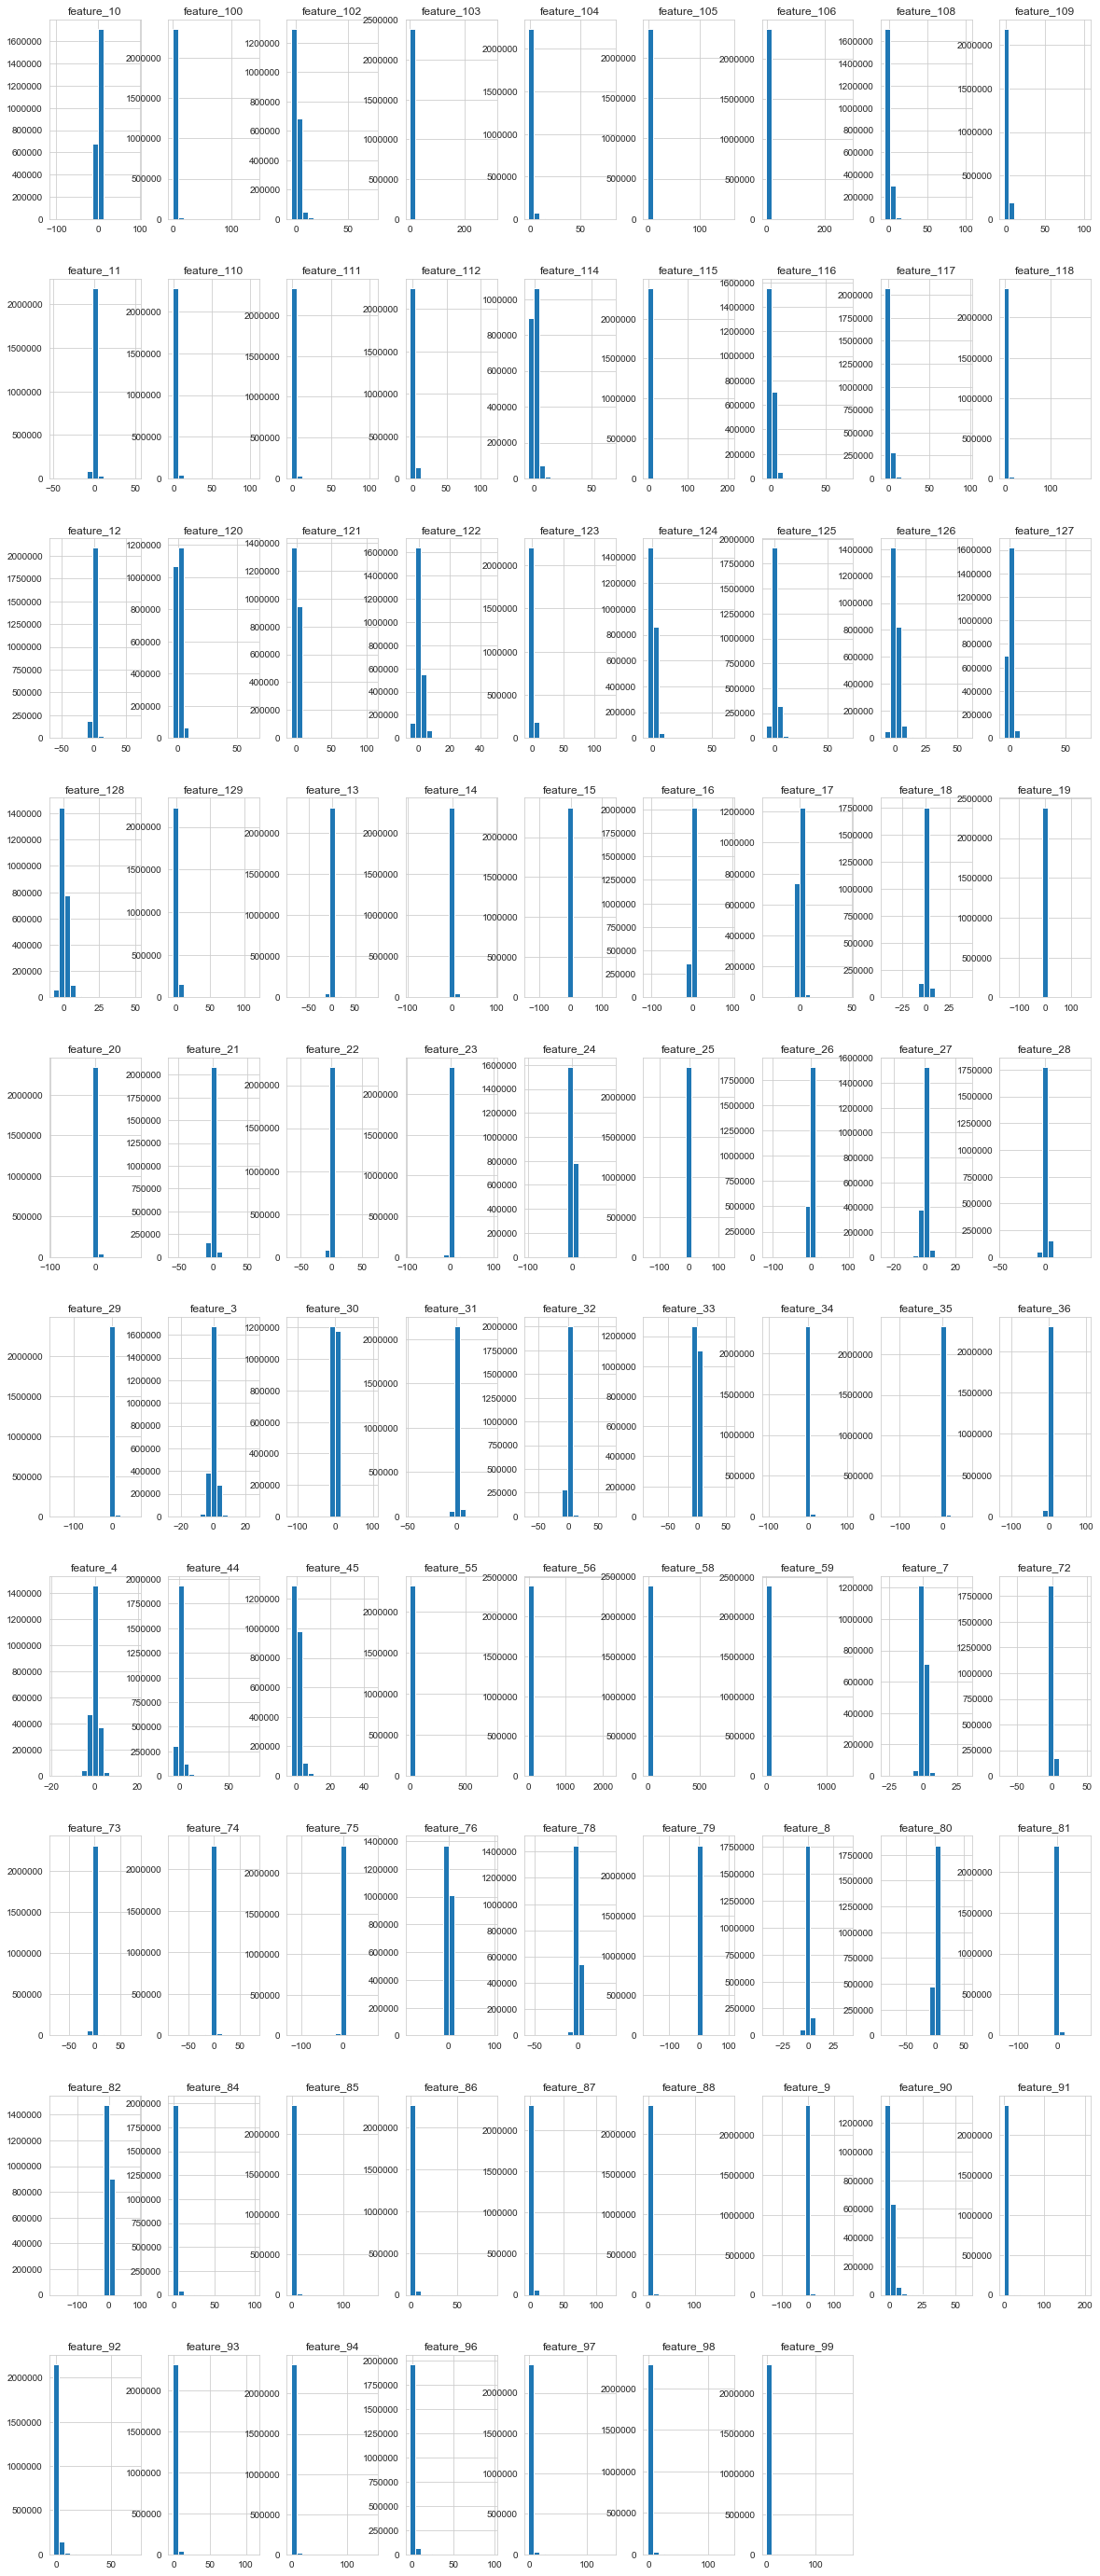

In [167]:
# let's look at the distributions of the variables to decide
# whether we use the mean or the median
# create a list of na variables
df_nalist = df_na['index'].to_list()

cols_to_use = df_nalist

train_na = pd.DataFrame(train, columns=cols_to_use)
train_na.hist(bins=15, figsize=(20,50))
plt.show()

##### Comments:
Since all of the features that have the missing values seem to have their existing values predominately in one range, the mean will be used AND random sample imputation will not be used since this may skew the data too much.

In [168]:
# load libraries
# these are the objects we need to impute missing data
# with sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Now we impute the missing values with SimpleImputer

# create an instance of the simple imputer
# we indicate that we want to impute with the median
imputer = SimpleImputer(strategy='mean')

# we fit the imputer to the train_na set
# the imputer will learn the median of all variables
imputer.fit(train_na)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [169]:
# we can look at the learnt means like this:
imputer.statistics_

array([ 1.13582109e-01,  1.60876306e-01,  1.35482981e-01,  1.21219317e-01,
        5.17765520e-02,  2.68280960e-02,  5.39329812e-03,  4.07112057e-01,
        3.98215840e-01,  3.99992635e-01,  4.05063018e-01, -6.05952373e-03,
        4.10252946e-01,  4.02268472e-01,  1.76978578e-01,  2.50131208e-01,
        2.20560417e-01,  1.86911313e-01,  4.94855352e-02,  8.91215618e-02,
        3.35127032e-01,  2.68775704e-01,  6.52597183e-01,  4.07107008e-01,
       -2.04454217e-04,  4.05080714e-01,  4.04432627e-01,  4.00735668e-01,
       -2.09945897e-03,  4.02404264e-01,  4.01655732e-01,  3.35153695e-01,
        2.44875245e-01, -1.90919467e-02,  4.08829893e-01,  4.06878071e-01,
       -1.44182745e-02,  4.07061319e-01,  4.01033372e-01,  3.35353320e-01,
        3.08221678e-01,  4.36857370e-01,  2.38560754e-01,  2.52441288e-01,
        8.90272235e-02,  1.43105352e-01,  4.44451050e-01,  3.39177795e-01,
        2.32380867e-01,  4.28893878e-01,  5.14094751e-01,  5.00122699e-01,
        3.85817054e-01, -

In [170]:
# and we can investigate the medians directly to corroborate
# the imputer did a good job
train[cols_to_use].mean()

feature_18     0.113582
feature_28     0.160876
feature_27     0.135483
feature_17     0.121219
feature_7      0.051777
                 ...   
feature_3      0.008919
feature_123    0.279997
feature_122    0.343552
feature_59     0.762590
feature_58     0.679812
Length: 88, dtype: float64

In [171]:
# and now we impute the train set

# NOTE: the data is returned as a numpy array!!!
train_na = imputer.transform(train_na)

train_na

array([[ 1.13582109e-01,  1.60876306e-01,  1.35482981e-01, ...,
         1.16839140e+00,  2.49006904e+00,  2.46882465e+00],
       [ 1.13582109e-01,  1.60876306e-01,  1.35482981e-01, ...,
        -1.17884986e+00, -8.88235717e-01, -1.70644982e+00],
       [ 1.13582109e-01,  1.60876306e-01,  1.35482981e-01, ...,
         6.11574729e+00,  9.53618719e-01,  6.22560553e-01],
       ...,
       [ 4.43754849e-01, -4.48208526e-03, -1.30024388e-02, ...,
        -6.40334164e-01, -4.33648086e-01, -1.55566980e+00],
       [-1.73564917e+00,  4.92689317e-02,  2.64205337e-02, ...,
        -1.78096165e+00, -5.31150186e-01, -1.76205486e+00],
       [-4.77442918e-01,  1.80414630e+00,  6.01387104e-01, ...,
         2.48342109e+00,  3.15564720e+01,  1.46186910e+01]])

In [172]:
# if we wanted to continue our data analysis, we would have to
# encode the train set back to a dataframe:

train_na = pd.DataFrame(train_na, columns=cols_to_use)
train_na.head()

,feature_18,feature_28,feature_27,feature_17,feature_7,feature_8,feature_72,feature_114,feature_84,feature_108,...,feature_30,feature_56,feature_44,feature_45,feature_4,feature_3,feature_123,feature_122,feature_59,feature_58
0,0.113582,0.160876,0.135483,0.121219,0.051777,0.026828,0.005393,0.407112,0.398216,0.399993,...,-0.448988,3.315812,-0.328607,1.689207,-0.323046,-0.474163,8.313583,1.168391,2.490069,2.468825
1,0.113582,0.160876,0.135483,0.121219,0.051777,0.026828,0.005393,0.407112,0.398216,0.399993,...,0.914465,-0.027262,-1.140081,0.716617,0.028432,0.068058,1.777472,-1.178850,-0.888236,-1.706450
2,0.113582,0.160876,0.135483,0.121219,0.051777,0.026828,0.005393,0.407112,0.398216,0.399993,...,4.314714,0.883247,0.162261,0.237987,0.400221,0.806463,9.667908,6.115747,0.953619,0.622561
3,0.113582,0.160876,0.135483,0.121219,0.051777,0.026828,0.005393,0.407112,0.398216,0.399993,...,4.528353,0.574002,0.192241,-0.622152,0.009357,0.066872,0.499251,2.838853,0.794274,0.840800
4,0.113582,0.160876,0.135483,0.121219,0.051777,0.026828,0.005393,0.407112,0.398216,0.399993,...,-1.722451,0.545999,-0.071239,2.085974,-0.128149,-0.161518,4.101145,0.344850,-0.402068,-1.265388


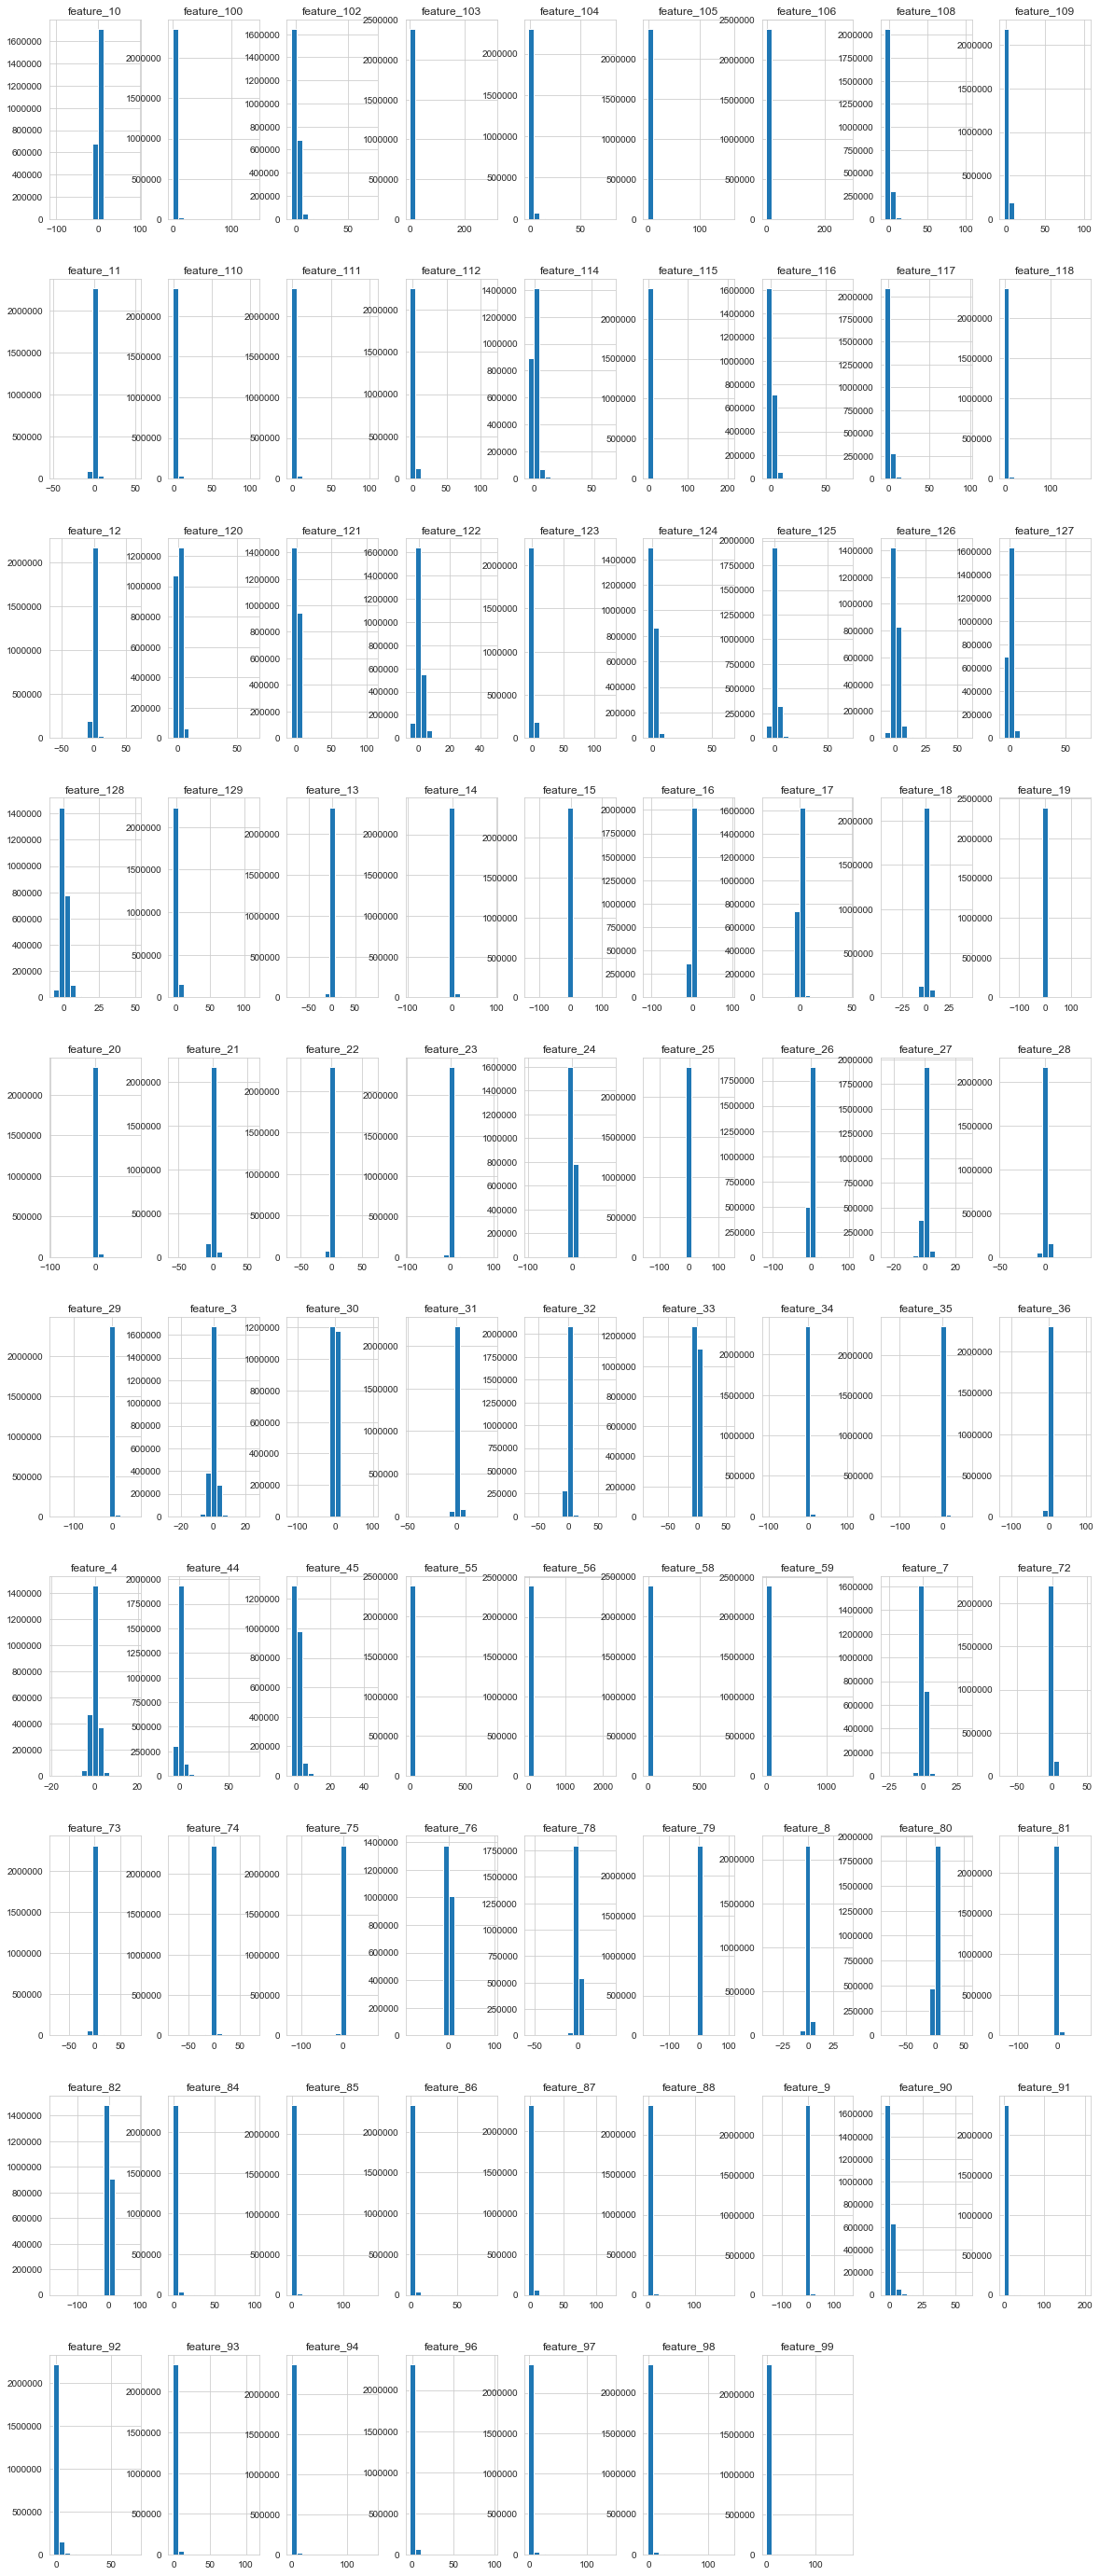

In [173]:
# Let's explore the change in the distributions after the median imputation

#train_na = pd.DataFrame(train, columns=cols_to_use)
train_na.hist(bins=15, figsize=(20,50))
plt.show()

In [182]:
# merge the columns of the imputed missing value dataframe with the columns of the original dataframe

# remove the columns that had NA values
train_trunc = train.drop(columns=cols_to_use)

# merge 2 dataframes on index
train_all = pd.merge(train_trunc, train_na, left_index=True, right_index=True)

In [185]:
train_all.head(n=5)

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_30,feature_56,feature_44,feature_45,feature_4,feature_3,feature_123,feature_122,feature_59,feature_58
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,...,-0.448988,3.315812,-0.328607,1.689207,-0.323046,-0.474163,8.313583,1.168391,2.490069,2.468825
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,...,0.914465,-0.027262,-1.140081,0.716617,0.028432,0.068058,1.777472,-1.178850,-0.888236,-1.706450
2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,-0.256156,...,4.314714,0.883247,0.162261,0.237987,0.400221,0.806463,9.667908,6.115747,0.953619,0.622561
3,0,0.000000,-0.004730,-0.003273,-0.000461,-0.000476,-0.003200,-1,1.174378,0.344640,...,4.528353,0.574002,0.192241,-0.622152,0.009357,0.066872,0.499251,2.838853,0.794274,0.840800
4,0,0.138531,0.001252,0.002165,-0.001215,-0.006219,-0.002604,1,-3.172026,-3.093182,...,-1.722451,0.545999,-0.071239,2.085974,-0.128149,-0.161518,4.101145,0.344850,-0.402068,-1.265388


## 6. Outliers
All data is numeric. Examine for outliers and address.
<br> There is not any categorical data.

## 7. Variable Transformation

## 8. Visualizations

## 9. Modeling

In [45]:
# should do visualizations here****
# UNIQUE VALUES

# Return a Series containing counts of unique values- has value and number of occurences
print(train['date'].value_counts())

44     18884
45     15174
459    14603
85     13842
38     13631
       ...  
14      2097
270      663
36       274
2        231
294       29
Name: date, Length: 500, dtype: int64


In [ ]:
#import janestreet
#env = janestreet.make_env() # initialize the environment
#iter_test = env.iter_test() # an iterator which loops over the test set

#for (test_df, sample_prediction_df) in iter_test:
#    sample_prediction_df.action = 0 #make your 0/1 prediction here
#    env.predict(sample_prediction_df)